Goal
Predict which employees are likely to leave the company.

Technologies Used
Python
Pandas, Seaborn
Scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()
df['Attrition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     1233
Yes     237
Name: count, dtype: int64

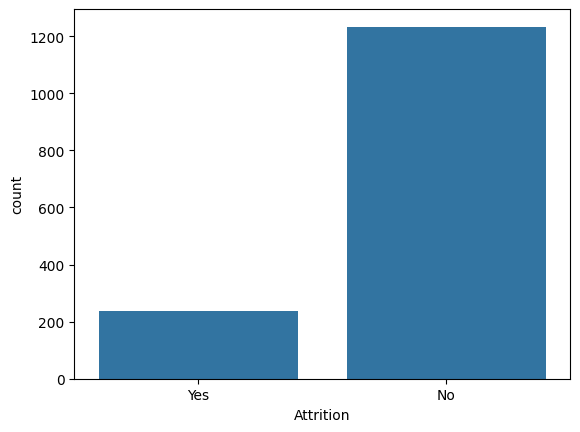

In [4]:
#Attrition Distribution
sns.countplot(x='Attrition' ,data=df)
plt.show()

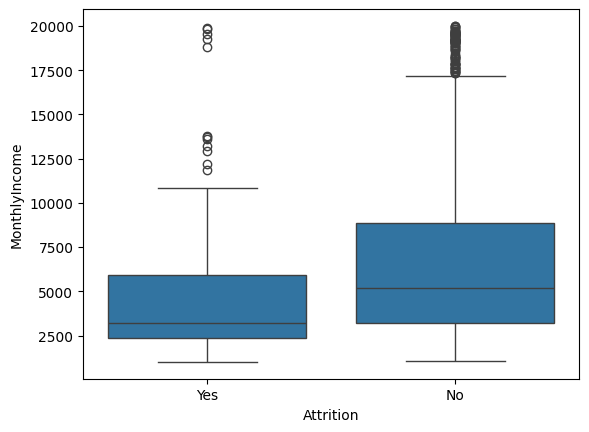

In [5]:
#Monthly Income vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()

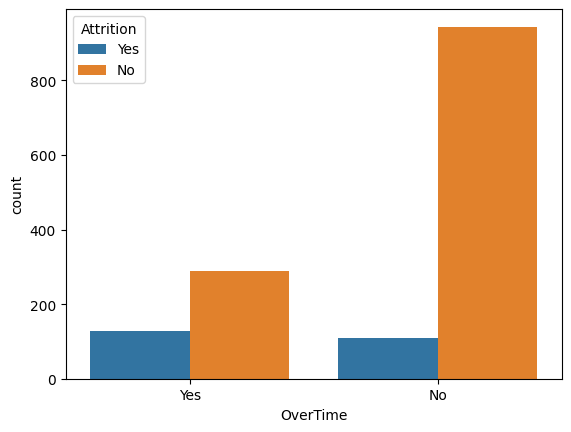

In [6]:
#Overtime vs Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.show()

In [7]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df.drop(['EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
importances = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

importances.head(10)

Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294



MonthlyIncome         0.078760
Age                   0.057820
OverTime_Yes          0.056402
DailyRate             0.051554
TotalWorkingYears     0.049339
MonthlyRate           0.048562
HourlyRate            0.044963
YearsAtCompany        0.042234
DistanceFromHome      0.041363
NumCompaniesWorked    0.036194
dtype: float64

Overall Business Conclusion 

The attrition prediction model reveals that salary, age, overtime, and work experience are the strongest predictors of employee turnover. Financial compensation and work-life balance play a more significant role than job role or department alone. Addressing these factors through competitive pay, reduced overtime, flexible work arrangements, and structured career growth programs can substantially reduce employee attrition.